# Example Notebook of AMaLa Inference

## Import required Packages

In [ ]:
using JLD2, PyPlot

In [4]:
using Amala

 Activating environment at `~/Packages/pslhd.jl/Project.toml`
┌ Info: Precompiling PslHD [b8e41cae-da29-41e5-93ae-d8573fee17fc]
└ @ Base loading.jl:1278


## Import Data

In [9]:
@load "../data.jld2"

1-element Array{Symbol,1}:
 :data_sim

#### Data structure overture

In [ ]:
The data scructure is built as a named tuple having the following fields:
- data.variants --> A list of all the sequences generated along the in silico experiment.
- data.counts --> A tensor structure associating to every sequence the related number of counts for experiment copy v=1,...,V and time t=t_1,...,T.
- data.wt_seq --> A tuple encoding the wild-type sequence of the simulated experiment
- data.A --> Number of a.a.'s symbols
- data.S --> Number of unique sequences
- data.L --> Length of the protein
- data.V --> Number of experiment copies
- data.T --> Number of sequenced rounds

### Create data structure Workspace

In [6]:
l2 = 0.01; #Regularization multiplier

In [21]:
w = Amala.Workspace(data_sim, data_sim.wt_seq; lambdaJE=l2, lambdaHE=l2, verbose=false);

## Inference

### Determine optimal mutation probability

In [8]:
p_vec = collect(0.003:0.001:0.007) #vector of p's to scan over

5-element Array{Float64,1}:
 0.003
 0.004
 0.005
 0.006
 0.007

In [12]:
idxr = data_sim.idxr;

In [13]:
beta = [t/idxr[1] for t in idxr] #Initial beta values

3-element Array{Float64,1}:
 1.0
 2.0
 2.5

In [15]:
res_p = Amala.learn_par(w,beta,idxr,p_vec);

(optf, status) = (0.09538440385312565, :FTOL_REACHED)
(optf, status) = (0.0759608663589572, :FTOL_REACHED)
(optf, status) = (0.11229676937428754, :FTOL_REACHED)
(optf, status) = (0.09073364449702911, :FTOL_REACHED)
(optf, status) = (0.1279190305268581, :FTOL_REACHED)
(optf, status) = (0.08266220373895287, :FTOL_REACHED)
(optf, status) = (0.1562896074602053, :FTOL_REACHED)
(optf, status) = (0.1187573774833788, :FTOL_REACHED)
(optf, status) = (0.11107112878579069, :FTOL_REACHED)
(optf, status) = (0.19313248176437642, :FTOL_REACHED)
(optf, status) = (0.10942103129400263, :FTOL_REACHED)
(optf, status) = (0.18174092892576504, :FTOL_REACHED)
(optf, status) = (0.2730345815017457, :FTOL_REACHED)
(optf, status) = (0.3175430660240732, :FTOL_REACHED)
(optf, status) = (0.16903398843116588, :FTOL_REACHED)
(optf, status) = (0.25081840948130874, :FTOL_REACHED)
(optf, status) = (0.43401838080304617, :FTOL_REACHED)
(optf, status) = (0.28274197222786124, :FTOL_REACHED)
(optf, status) = (0.41821372723824

In [18]:
p_opt = res_p.p #Optimal mutation probability

0.006

### Determine optimal beta

In [19]:
nu = Amala.comp_JC.(data_sim.A,p_opt,idxr) #Defining JC coefficient

3-element Array{Float64,1}:
 6.6595583271371925
 5.954972973532422
 5.726102194837862

#### Raw beta-scan

In [37]:
bgrid = [collect(2.2:0.05:2.4),collect(2.6:0.05:2.8)]

2-element Array{Array{Float64,1},1}:
 [2.2, 2.25, 2.3, 2.35, 2.4]
 [2.6, 2.65, 2.7, 2.75, 2.8]

In [38]:
psl_b = Amala.learn_par(w,bgrid,nu);

[1.0, 2.2, 2.6]
[1.0, 2.25, 2.6]
[1.0, 2.3, 2.6]
[1.0, 2.35, 2.6]
[1.0, 2.4, 2.6]
[1.0, 2.2, 2.65]
[1.0, 2.25, 2.65]
[1.0, 2.3, 2.65]
[1.0, 2.35, 2.65]
[1.0, 2.4, 2.65]
[1.0, 2.2, 2.7]
[1.0, 2.25, 2.7]
[1.0, 2.3, 2.7]
[1.0, 2.35, 2.7]
[1.0, 2.4, 2.7]
[1.0, 2.2, 2.75]
[1.0, 2.25, 2.75]
[1.0, 2.3, 2.75]
[1.0, 2.35, 2.75]
[1.0, 2.4, 2.75]
[1.0, 2.2, 2.8]
[1.0, 2.25, 2.8]
[1.0, 2.3, 2.8]
[1.0, 2.35, 2.8]
[1.0, 2.4, 2.8]


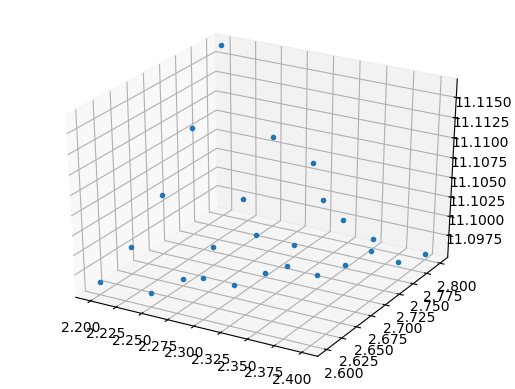

In [39]:
plot3D(psl_b[:,1],psl_b[:,2],psl_b[:,3],"."); #Plotting psl landscape

In [40]:
psl_b[findmin(psl_b[:,3])[2],:]

3-element Array{Float64,1}:
  2.35
  2.75
 11.095062420831852

#### Fine beta GD

In [43]:
res_b = Amala.learn_par(w, nu; bstart=[2.33, 2.73], maxit_global=20, betatol=1.0e-5, b_iter=4);

beta start: [2.33, 2.73]
[2.328474323604177, 2.731495849515711]
> [2.328474323604177, 2.731495849515711] ([0.0006552257761044821, 0.0005476301624167297])

[2.328415572297449, 2.7317237678064443]
> [2.328415572297449, 2.7317237678064443] ([2.523231137390369e-5, 8.34338718356021e-5])

[2.3284879357297954, 2.7318348267969634]
> [2.3284879357297954, 2.7318348267969634] ([3.107743494647287e-5, 4.0653625698638394e-5])

[2.3285648521350217, 2.7319299266195807]
> [2.3285648521350217, 2.7319299266195807] ([3.303167835579566e-5, 3.48104911808311e-5])

[2.328643499656897, 2.73202652872889]
> [2.328643499656897, 2.73202652872889] ([3.3773964064083864e-5, 3.535914029140829e-5])

[2.328717247661412, 2.732116500829116]
> [2.328717247661412, 2.732116500829116] ([3.1668939021610566e-5, 3.293128246866306e-5])

[2.328787829959051, 2.7322013224279225]
> [2.328787829959051, 2.7322013224279225] ([3.0308599491543787e-5, 3.10451496052794e-5])

[2.3288631801768163, 2.732290639493208]
> [2.3288631801768163, 2.7

In [45]:
b_opt = vcat(1.0,res_b.beta)

3-element Array{Float64,1}:
 1.0
 2.329588447161826
 2.733164179201552

### Final Inference

In [46]:
res_bp_opt = Amala.learn_par(w, b_opt, nu; ParStart=res_b.ParMat);